In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('ps1_data1.csv')

In [4]:
data

array([[1.61646318, 7.53700018],
       [1.48238301, 7.52199984],
       [1.48063302, 7.50400019],
       [1.56497955, 7.49399996],
       [1.44357193, 7.46899986],
       [1.50394464, 7.37699986],
       [1.47920442, 7.31599999],
       [1.40570605, 7.31400013],
       [1.49438727, 7.28399992],
       [1.48441493, 7.28399992],
       [1.37538242, 7.21299982],
       [1.10970628, 7.079     ],
       [1.48709726, 7.00600004],
       [1.54625928, 6.99300003],
       [1.53570664, 6.97700024],
       [1.48792338, 6.95100021],
       [1.46378076, 6.89099979],
       [1.7419436 , 6.86299992],
       [1.44163394, 6.71400023],
       [1.25278461, 6.65199995],
       [1.62634337, 6.64799976],
       [1.10735321, 6.63500023],
       [1.35268235, 6.60900021],
       [1.18529546, 6.59899998],
       [1.15318382, 6.57800007],
       [1.69227767, 6.57200003],
       [1.34327984, 6.52699995],
       [1.2175597 , 6.454     ],
       [0.87200195, 6.454     ],
       [1.23374844, 6.45200014],
       [1.

In [5]:
def setVariables(data_array) :
    """
    The function set_variables() is called on one argument:
    
        data_array - an np.array 
        
    and returns three global variables:
        x - the first column of data_array
        y - the second column of the data_array
        m - the number of rows of the data_array na
    Your code should run on any two-column data_array.
    """
    global x
    global y
    global m
    x = data_array[:, 0]
    y = data_array[:, 1]
    m = len(y)
    return x, y, m

In [6]:
setVariables(data)

(array([1.61646318, 1.48238301, 1.48063302, 1.56497955, 1.44357193,
        1.50394464, 1.47920442, 1.40570605, 1.49438727, 1.48441493,
        1.37538242, 1.10970628, 1.48709726, 1.54625928, 1.53570664,
        1.48792338, 1.46378076, 1.7419436 , 1.44163394, 1.25278461,
        1.62634337, 1.10735321, 1.35268235, 1.18529546, 1.15318382,
        1.69227767, 1.34327984, 1.2175597 , 0.87200195, 1.23374844,
        1.43092346, 1.12786877, 1.43362653, 1.38439786, 1.87076569,
        1.07062232, 1.53062356, 1.3613559 , 1.63295245, 1.32539356,
        1.48841226, 1.29121542, 0.7372992 , 1.0008204 , 0.9097845 ,
        1.29178786, 0.78644109, 1.39506662, 1.2817781 , 0.90797532,
        1.41691518, 1.31458235, 1.09186447, 1.26074862, 1.40167844,
        0.72887063, 1.21768391, 0.83375657, 1.13077676, 1.28455627,
        1.34691131, 1.34120595, 1.03522527, 1.18939555, 1.35593808,
        1.32087934, 1.15655756, 1.10180306, 1.19827437, 0.93253732,
        1.55167484, 0.85769922, 1.06931758, 0.99

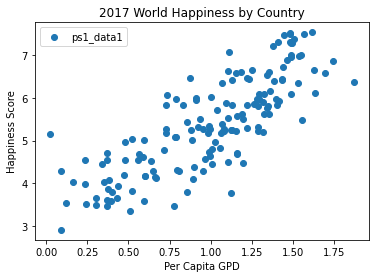

In [9]:
plt.scatter(x,y, label="ps1_data1")
plt.title('2017 World Happiness by Country')
plt.xlabel(r'Per Capita GPD')
plt.ylabel(r'Happiness Score')
plt.legend()

In [10]:
def initialize(data_array, init_theta0, init_theta1):
    """Initialize data and parameters for ps1_data1.csv
    
            data_array  - an (m,2) np.array
            init_theta0 - float
            init_theta1 - float
        
    and returns two global variables:
        X     an (m,2) array: a column of 1s and the first column of data_array, where m
              is the number of rows in data_array
        theta a (2,) vector initialized to init_theta0 and init_theta_1
    
    Your function should work for any (m,2) array, formatted as ps1_data1.csv is wrt 
    feature column and target column, and any floats init_theta_0, init_theta1
    """
    X = np.ones((m, 2))
    X[:,1] = data_array[:,0]
    theta = np.array([init_theta0, init_theta1])
    return theta, X

In [11]:
# initialize the arrays with your function
theta, X = initialize(data, 0.0,0.0)

In [12]:
def costJ(X, y, theta):
    """Implement the squared-error cost function, compute_cost_J.
    compute_cost_J(X, y, theta) computes the cost of using the
    theta to parameterize a linear regression hypothesis to fit
    the data in X and y.
    """
    z = np.power(((X @ theta.T) - y), 2)
    ans = np.sum(z) / (2 * len(X))
    return ans

In [15]:
def batchGradientDescent(X, y, theta, alpha, num_iterations):
    """gradient_descent performs batch gradient descent to minimize theta and return a history
    of the gradient steps to plot.

    gradient_descent updates theta by taking a number of gradient steps, fixed by the
    parameter num_iterations, where the size of those steps is determined by the learning

    rate, alpha.
    """
    ## Initialize variables
    # m is the number of training samples
    m= len(y)

    # J_history is the cost function history, intialized to a vector of zeros
    # for each iteration step
    J_history = np.zeros(num_iterations)
    # initialize theta_new with a copy of theta.

    theta_new = theta.copy()
    for idx in range(num_iterations):
        theta_new = theta_new - (1/m)*alpha*(X.T.dot((np.dot(X, theta_new)-y)))
        J_history[idx] = costJ(X, y, theta_new)

    return theta_new, J_history

In [16]:
## gradient_descent adjustable parameters
# learning rate
alpha = 0.2
#number of iterations
iterations = 1100

In [17]:
# run gradient descent
theta_new, J_history = batchGradientDescent(X, y, theta, alpha, iterations)

In [18]:
theta_new

array([3.22558776, 2.164952  ])

Text(0, 0.5, '$J(\\theta)$')

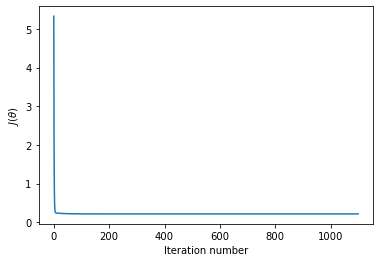

In [19]:
plt.plot(J_history)
plt.xlabel(r'Iteration number' )
plt.ylabel(r'$J(\theta)$')

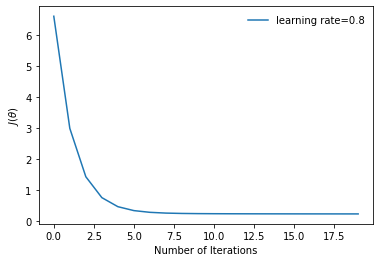

In [20]:
alphas = [0.8]
iters = 20
for aa in alphas:
    theta_new, J_history = batchGradientDescent(X, y, theta, aa, iters)
    plt.plot(J_history, label='learning rate={0}'.format(aa) )

plt.ylabel(r'$J(\theta)$')
plt.xlabel(r'Number of Iterations' )
plt.legend(loc='best', frameon=False)

In [21]:
J_history

array([6.620176  , 2.98892945, 1.42244155, 0.74595476, 0.45318894,
       0.32594304, 0.27016464, 0.24530494, 0.23387436, 0.22832249,
       0.22538387, 0.22364107, 0.22247439, 0.22160901, 0.22091973,
       0.2203467 , 0.21985897, 0.21943873, 0.21907436, 0.21875746])

In [23]:
# import sklearn linear regression 
from sklearn.linear_model import LinearRegression

In [24]:
# instantiate model
model = LinearRegression()
# fit the model
model.fit(X, y)

LinearRegression()

In [25]:
#print theta0 and theta1
print('theta_0:', model.intercept_)
print('theta_1:', model.coef_[1])  # model.coef_ returns an array

theta_0: 3.2255877706752263
theta_1: 2.1649519939763175


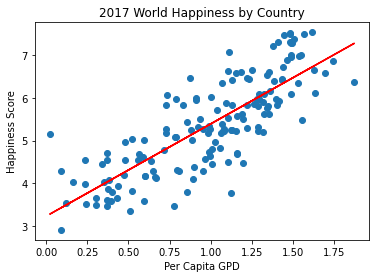

In [26]:
plt.scatter(x, y)
plt.title('2017 World Happiness by Country')
plt.xlabel(r'Per Capita GPD')
plt.ylabel(r'Happiness Score')
plt.plot(x, model.predict(X),color='r')

In [27]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6487826791386584


<AxesSubplot:>

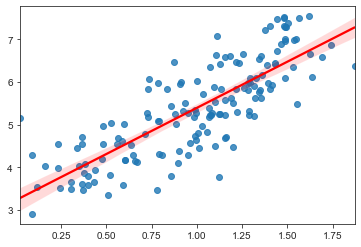

In [28]:
import seaborn as sns
sns.set_style("ticks")
sns.regplot(x=x,y=y,line_kws = {"color": 'r'})